In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [5]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [6]:
cd drive/MyDrive/Simplilearn/csv

/content/drive/MyDrive/Simplilearn/csv


In [7]:
df_house=pd.read_csv('melb_data.csv')

In [8]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [9]:
df_house.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [10]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [11]:
df_house.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [12]:
df_house=df_house.dropna(axis=0)

In [13]:
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude','Price']

In [14]:
X=df_house[melbourne_features]
y=df_house['Price']

In [15]:
X.head()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude,Price
1,2,1.0,156.0,-37.8079,144.9934,1035000.0
2,3,2.0,134.0,-37.8093,144.9944,1465000.0
4,4,1.0,120.0,-37.8072,144.9941,1600000.0
6,3,2.0,245.0,-37.8024,144.9993,1876000.0
7,2,1.0,256.0,-37.8060,144.9954,1636000.0


<Axes: >

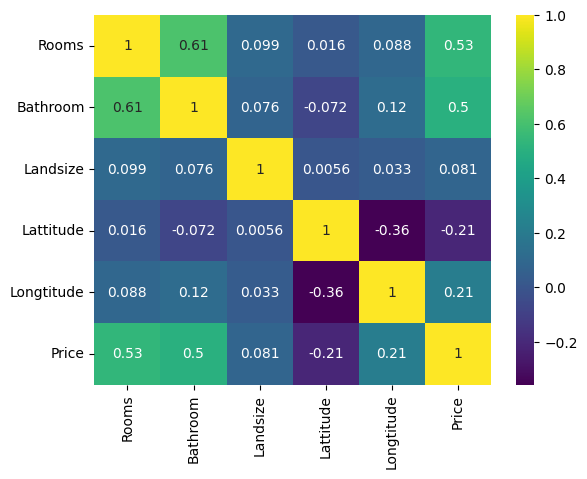

In [16]:
sns.heatmap(X.corr(),cmap="viridis",annot=True)

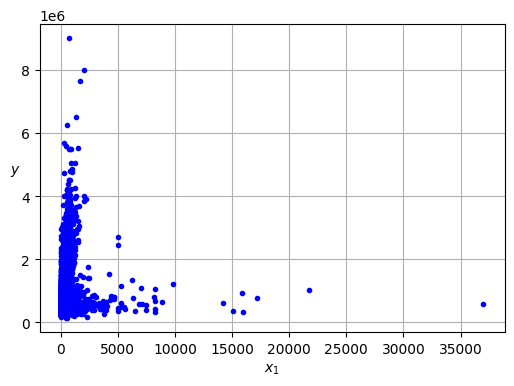

In [17]:
plt.figure(figsize=(6,4))
plt.plot(X['Landsize'],y,'b.')
plt.xlabel('$x_1$')
plt.ylabel('$y$',rotation=0)
#plt.axis([0,2,0,15])
plt.grid()
plt.show()

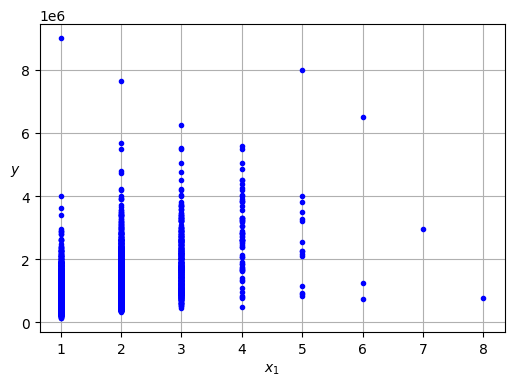

In [18]:
plt.figure(figsize=(6,4))
plt.plot(X['Bathroom'],y,'b.')
plt.xlabel('$x_1$')
plt.ylabel('$y$',rotation=0)
#plt.axis([0,2,0,15])
plt.grid()
plt.show()

##### Taking only one column

In [19]:
x=X['Rooms'].values.reshape(-1,1)

In [20]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x,y)


LinearRegression()

In [21]:
lin_reg.intercept_,lin_reg.coef_

(-18510.60568418773, array([370927.22858664]))

In [22]:
lin_reg.predict([[6]])

array([2207052.76583568])

## Taking all the columns

In [23]:
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(1.979060471057892e-08,
 array([ 1.68141912e-10, -7.06426029e-11, -7.71464056e-16,  5.24526755e-10,
         1.39434890e-12,  1.00000000e+00]))

## Trian Test split

In [24]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [25]:
len(X)

6196

In [26]:
len(X_train)

4337

In [27]:
len(X_test)

1859

In [28]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
lin_reg.intercept_,lin_reg.coef_

(2.0256265997886658e-08,
 array([ 1.76314831e-10,  1.63732472e-10,  2.63696942e-15,  3.78132493e-10,
        -3.78627047e-11,  1.00000000e+00]))

#### Metrics

* MAE=1/n Sigma|y^-y|
*

In [29]:
y_pred = lin_reg.predict(X_test)

In [30]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,y_pred)

3.5679223918451056e-19

In [31]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

4.812699580798552e-10

##    R-squared ranges from 0 to 1.
    A value of 1 indicates that the model perfectly predicts the target variable based on the independent variables.
    A value of 0 indicates that the model does not explain any of the variability in the target variable.

In [32]:
from sklearn.metrics import r2_score

r_squared=r2_score(y_test,y_pred)

In [33]:
n = X_test.shape[0]  # Number of samples
k = X_test.shape[1]  # Number of predictors (features)
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - k - 1)

In [34]:
print("R-squared:", r_squared)
print("Adjusted R-squared:", adjusted_r_squared)

R-squared: 1.0
Adjusted R-squared: 1.0


## Gradeint Descent

In [35]:
from sklearn.linear_model import SGDRegressor

In [36]:
sgd_reg = SGDRegressor(max_iter=1000,tol=1e-5,penalty=None,eta0=0.01,n_iter_no_change=100,random_state=42)

#### parameters :
* max_iter : maximum of iterations (epochs) , if the eta is not choosen properly there is a chance it wil keep bomabarding
* tol : algorithm stops when the error is 1*10^-5
* eta0 : learning rate
* n_iter_no_change : when there is no change in the learning of the error then stop the training of the model



In [37]:
sgd_reg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

#### The warning is because as we have not got the optimal solution but the algorithm is stopped as max iterations reached change the value max-iter then the convergence happens.

In [38]:
sgd_reg.intercept_,sgd_reg.coef_

(array([3.79787454e+11]),
 array([ 8.31805117e+11, -3.28934941e+11,  2.36339614e+14, -1.43559720e+13,
         5.50109430e+13, -2.27129210e+14]))

In [39]:
y_pred=sgd_reg.predict(X_test)

In [40]:
mean_squared_error(y_test,y_pred)

7.716363578044123e+40

In [41]:
mean_absolute_error(y_test,y_pred)

2.380383729665978e+20

In [42]:
r_squared=r2_score(y_test,y_pred)

In [43]:
n = X_test.shape[0]  # Number of samples
k = X_test.shape[1]  # Number of predictors (features)
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - k - 1)

In [44]:
print("R-squared:", r_squared)
print("Adjusted R-squared:", adjusted_r_squared)

R-squared: -1.9411427556815728e+29
Adjusted R-squared: -1.947431555106027e+29


### to check how many iterations it has done

In [45]:
sgd_reg.n_iter_

1000

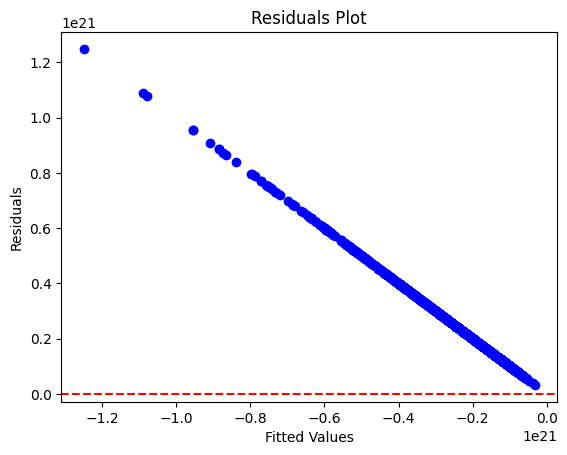

In [46]:
residuals = y_test - y_pred

# Create a residuals plot
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at zero
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

In [47]:
sgd_reg = SGDRegressor(max_iter=10000,tol=1e-2,penalty=None,eta0=0.01,n_iter_no_change=100,random_state=42)
sgd_reg.fit(X_train,y_train)
sgd_reg.intercept_,sgd_reg.coef_,sgd_reg.n_iter_

(array([2.48215616e+11]),
 array([ 6.10313973e+11, -2.75203741e+11,  4.16154707e+13, -9.36135805e+12,
         3.58685114e+13, -1.13834311e+14]),
 2050)

In [48]:
sgd_reg = SGDRegressor(max_iter=10000,tol=1e-2,penalty=None,eta0=0.0001,n_iter_no_change=100,random_state=42)
sgd_reg.fit(X_train,y_train)
sgd_reg.intercept_,sgd_reg.coef_,sgd_reg.n_iter_

(array([-4.23976295e+09]),
 array([-1.40292532e+10, -1.05755802e+10, -4.81781183e+11,  1.60140316e+11,
        -6.13728864e+11,  1.13791572e+12]),
 2050)

In [49]:
import pandas as pd

# Get help on the sort_values function
help(pd.DataFrame.sort_values)

Help on function sort_values in module pandas.core.frame:

sort_values(self, by: 'IndexLabel', *, axis: 'Axis' = 0, ascending: 'bool | list[bool] | tuple[bool, ...]' = True, inplace: 'bool' = False, kind: 'str' = 'quicksort', na_position: 'str' = 'last', ignore_index: 'bool' = False, key: 'ValueKeyFunc' = None) -> 'DataFrame | None'
    Sort by the values along either axis.
    
    Parameters
    ----------
            by : str or list of str
                Name or list of names to sort by.
    
                - if `axis` is 0 or `'index'` then `by` may contain index
                  levels and/or column labels.
                - if `axis` is 1 or `'columns'` then `by` may contain column
                  levels and/or index labels.
    axis : {0 or 'index', 1 or 'columns'}, default 0
         Axis to be sorted.
    ascending : bool or list of bool, default True
         Sort ascending vs. descending. Specify list for multiple sort
         orders.  If this is a list of bools, must

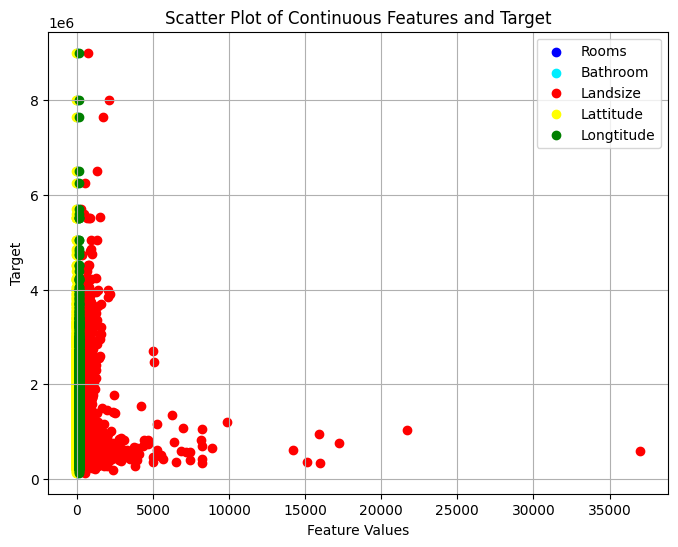

In [50]:
plt.figure(figsize=(8, 6))
plt.scatter(X['Rooms'], y, color='blue', label='Rooms')
plt.scatter(X['Bathroom'], y, color='#00eeff', label='Bathroom')
plt.scatter(X['Landsize'], y, color='red', label='Landsize')
plt.scatter(X['Lattitude'], y, color='yellow', label='Lattitude')
plt.scatter(X['Longtitude'], y, color='green', label='Longtitude')
plt.xlabel('Feature Values')
plt.ylabel('Target')
plt.title('Scatter Plot of Continuous Features and Target')
plt.legend()
plt.grid(True)
plt.show()

## Polynomial Regression

* Basically when we see that the features of the data and target varibales have non linear relation then LinearRegression cant give you the better results. In order to get the best results for non linear data , as a preprocessing step we will pass the features to the PolynomialFeatures then the preprocessed data will be given to the LinearRegression.
* In this we have to set the degree and set the include_bias as False as the same will be taken care in linearRegression model.



In [51]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=1,include_bias=False)

In [52]:
poly_features.fit(X)
X_poly=poly_features.transform(X)
##poly_features.fit_transform(X)

In [53]:
print(X_poly)

[[ 2.0000000e+00  1.0000000e+00  1.5600000e+02 -3.7807900e+01
   1.4499340e+02  1.0350000e+06]
 [ 3.0000000e+00  2.0000000e+00  1.3400000e+02 -3.7809300e+01
   1.4499440e+02  1.4650000e+06]
 [ 4.0000000e+00  1.0000000e+00  1.2000000e+02 -3.7807200e+01
   1.4499410e+02  1.6000000e+06]
 ...
 [ 1.0000000e+00  1.0000000e+00  0.0000000e+00 -3.7855880e+01
   1.4489936e+02  3.8500000e+05]
 [ 2.0000000e+00  1.0000000e+00  0.0000000e+00 -3.7855810e+01
   1.4499025e+02  5.6000000e+05]
 [ 6.0000000e+00  3.0000000e+00  1.0870000e+03 -3.7810380e+01
   1.4489389e+02  2.4500000e+06]]


In [54]:
X_poly.shape

(6196, 6)

In [55]:
poly_features = PolynomialFeatures(degree=2,include_bias=False)
poly_features.fit(X)
X_poly=poly_features.transform(X)
print(X_poly)

[[2.00000000e+00 1.00000000e+00 1.56000000e+02 ... 2.10230860e+04
  1.50068169e+08 1.07122500e+12]
 [3.00000000e+00 2.00000000e+00 1.34000000e+02 ... 2.10233760e+04
  2.12416796e+08 2.14622500e+12]
 [4.00000000e+00 1.00000000e+00 1.20000000e+02 ... 2.10232890e+04
  2.31990560e+08 2.56000000e+12]
 ...
 [1.00000000e+00 1.00000000e+00 0.00000000e+00 ... 2.09958245e+04
  5.57862536e+07 1.48225000e+11]
 [2.00000000e+00 1.00000000e+00 0.00000000e+00 ... 2.10221726e+04
  8.11945400e+07 3.13600000e+11]
 [6.00000000e+00 3.00000000e+00 1.08700000e+03 ... 2.09942394e+04
  3.54990030e+08 6.00250000e+12]]


In [56]:
X_poly.shape

(6196, 27)

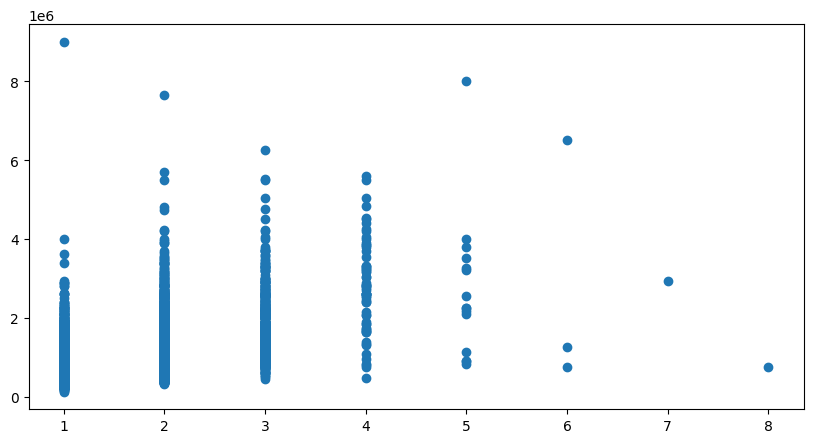

In [57]:
plt.figure(figsize=(10,5))
plt.scatter(X['Bathroom'],y)
plt.show()

In [58]:
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_

(-4.198402166366577e-06,
 array([ 5.82169696e-07,  4.08391643e-07, -3.29543881e-10, -3.18991065e-09,
         4.27553811e-08,  1.00000000e+00, -2.38548945e-11,  1.20178176e-10,
         1.93303722e-13,  3.68370809e-10, -3.91780194e-09,  3.94401723e-18,
         3.02466145e-11,  2.04170855e-14, -7.65624496e-10, -3.02084979e-09,
        -1.40224236e-16,  1.85216061e-16, -1.48519744e-12,  1.88508631e-12,
        -6.24879537e-18,  3.01784730e-10,  1.75419891e-10,  1.33866351e-15,
        -7.57051061e-11,  3.12446954e-15,  8.47032947e-22]))

In [59]:
y.shape

(6196,)

In [60]:
X_poly.shape

(6196, 27)

In [61]:
y_pred=lin_reg.predict(X_poly)
mean_squared_error(y,y_pred)

1.2014386411190789e-17

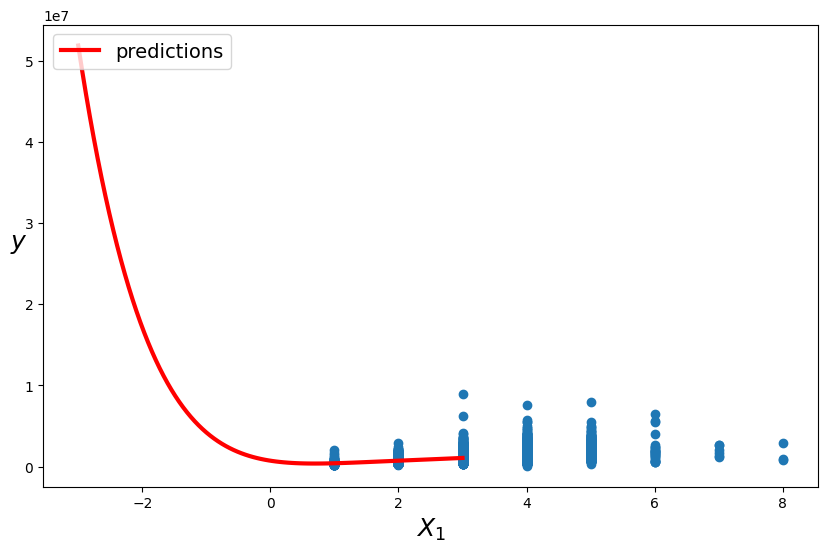

In [62]:

poly_features = PolynomialFeatures(degree=6,include_bias=False)
poly_features.fit(X['Rooms'].values.reshape(-1,1))
X_poly=poly_features.transform(X['Rooms'].values.reshape(-1,1))
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_

X_new = np.linspace(-3,3,100).reshape(100,1)
X_new_poly=poly_features.transform(X_new)

plt.figure(figsize=(10,6))
plt.scatter(X['Rooms'],y)

plt.plot(X_new,lin_reg.predict(X_new_poly),'r-',linewidth=3,label='predictions')
plt.xlabel('$X_1$',fontsize=18)
plt.ylabel('$y$',rotation=0,fontsize=18)
plt.legend(loc='upper left',fontsize=14)
#plt.axis([-3.5,3.5,0,11])

plt.show()



#### When coefficients are very large model overfits. to overcome this we will use Regularization.

* J(theta) = MSE + alpha * ||w||
  * alpha  : amount of regularization
  * where ||w|| = L1 - normalization



In [63]:
max(lin_reg.coef_)

1431131.7292010675

In [64]:
min(lin_reg.coef_)

-1233291.4054226272

In [65]:
abs(lin_reg.coef_).max(),abs(lin_reg.coef_).min()

(1431131.7292010675, 744.4654023572803)

Observation:
* we can see that the coefficient values where the maximum and minimum have huge difference , the max value might cause the overfitting of the model , that is why we go with the regularuzation.

#### Ridge regression
-----------------------------------------------------------


* It will perform the regression for reguarized cost function.

* It will add penalty based on the solver selected ,as solver specifies the method selected for cost function.

In [66]:
from sklearn.linear_model import Ridge

In [67]:
rdg = Ridge(alpha=5,solver='cholesky',random_state=42)
rdg.fit(X_train,y_train)
y_pred=rdg.predict(X_test)

In [68]:
rdg.coef_

array([ 9.30874943e-10,  3.86849771e-10,  3.73159704e-14, -4.15110291e-09,
        9.18659539e-10,  1.00000000e+00])

In [69]:
max(rdg.coef_)

0.9999999999999972

In [70]:
min(rdg.coef_)

-4.151102914442032e-09

#### setting alpha=0 and solver = cholesky it is same as using LinearRegression which uses closed form solution i.e, OLS ( Ordinary least squares)

* solver specifies the technique used to obtain the THETA values.


In [71]:
mean_absolute_error(y_test,y_pred)

9.829079007881185e-10

In [72]:
mean_absolute_error

<function sklearn.metrics._regression.mean_absolute_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')>

In [73]:
from sklearn.linear_model import Lasso

In [75]:
lasso_reg = Lasso(alpha=0.05)
lasso_reg.fit(X_train,y_train)
y_pred=lasso_reg.predict(X_test)
mean_absolute_error(y_test,y_pred)

4.95133494919205e-08

In [77]:
lasso_reg.coef_,lasso_reg.intercept_

(array([-0., -0.,  0., -0.,  0.,  1.]), 1.1199153959751129e-07)

In Lasso Regression if any of the coefficients becomes zero then that feature is irrelevant for the prediction.

## Elastic-net:
---------------------------------------

* l1 : amount of L1 specifies the Lasso regression
* l2 : amount of L2 specifies the Ridge regression

In [78]:
from sklearn.linear_model import ElasticNet

ela_reg = ElasticNet(alpha=0.2,l1_ratio=0.1)
ela_reg.fit(X_train,y_train)
y_pred = ela_reg.predict(X_test)
print(mean_absolute_error(y_test,y_pred))


1.9828150060875497e-07
